In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

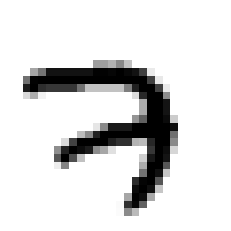

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

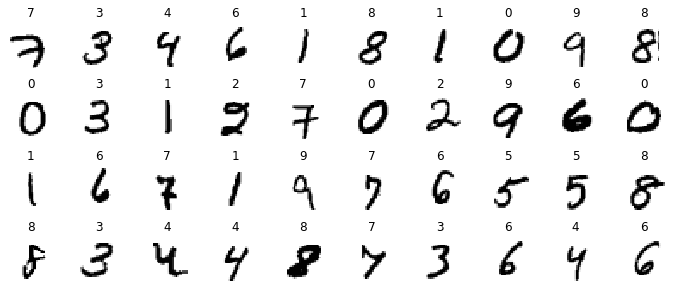

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6196 - accuracy: 0.8405 - val_loss: 0.3103 - val_accuracy: 0.9120
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.9151 - val_loss: 0.2473 - val_accuracy: 0.9304
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2430 - accuracy: 0.9302 - val_loss: 0.2060 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2075 - accuracy: 0.9406 - val_loss: 0.1823 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1811 - accuracy: 0.9485 - val_loss: 0.1645 - val_accuracy: 0.9536
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1603 - accuracy: 0.9543 - val_loss: 0.1483 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1431 - accuracy: 0.9598 - val_loss: 0.1367 - val_accuracy:

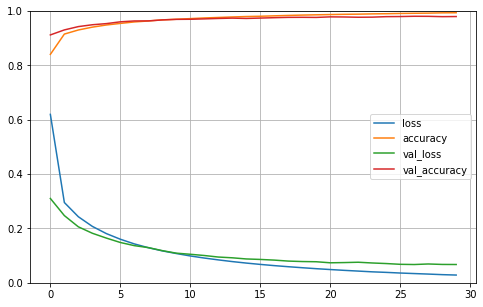

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9799


[0.06884098052978516, 0.9799000024795532]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

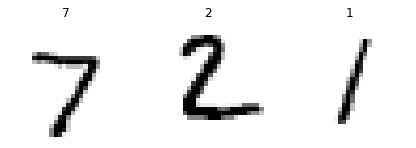

In [15]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Do modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia


In [16]:
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Dense


model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(300))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9487 - accuracy: 0.6985 - val_loss: 0.3586 - val_accuracy: 0.8910
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5590 - accuracy: 0.8239 - val_loss: 0.2775 - val_accuracy: 0.9144
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4820 - accuracy: 0.8485 - val_loss: 0.2386 - val_accuracy: 0.9274
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4407 - accuracy: 0.8612 - val_loss: 0.2164 - val_accuracy: 0.9342
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4048 - accuracy: 0.8726 - val_loss: 0.1990 - val_accuracy: 0.9406
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3833 - accuracy: 0.8801 - val_loss: 0.1877 - val_accuracy: 0.9416
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3666 - accuracy: 0.8852 - val_loss: 0.1747 - val_accuracy:

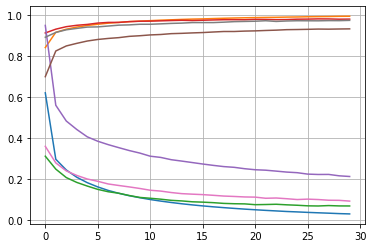

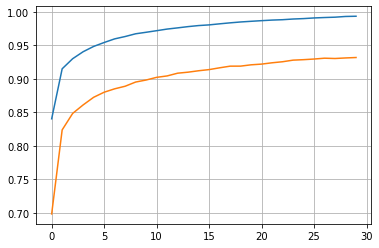

In [17]:
plt.plot(pd.DataFrame(history.history))
plt.plot(pd.DataFrame(history2.history))
plt.grid(True)
plt.show()
plt.plot(pd.DataFrame(history.history["accuracy"]))
plt.plot(pd.DataFrame(history2.history["accuracy"]))
plt.grid(True)
plt.show()